In [37]:
import idx2numpy
import numpy as np
import copy

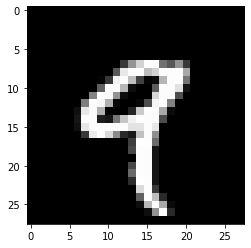

In [30]:
from PIL import Image
img = Image.fromarray(arr[4])
import matplotlib.pyplot as plt

arr = idx2numpy.convert_from_file(file)
img = arr[4]
plt.imshow(img, cmap="gray")

In [31]:
train_x = idx2numpy.convert_from_file("train-images-idx3-ubyte")
train_y = idx2numpy.convert_from_file("train-labels-idx1-ubyte")

In [241]:
test_x = idx2numpy.convert_from_file("t10k-images-idx3-ubyte")
test_y = idx2numpy.convert_from_file("t10k-labels-idx1-ubyte")

In [72]:
def one_hot_encoding(label, classes = 10):
    """One hot encode the labels"""
    
    assert isinstance(label, np.ndarray)
    assert isinstance(classes, int)

    one_hot_labels = np.zeros((classes, len(label)))  # 10, 60000
    
    for n in range(len(label)):
        one_hot_labels[label[n], n] = 1
        
    return one_hot_labels

In [199]:
def reverse_one_hot_encoding(one_hot_label, classes = 10):
    """Reverse the one hot encoding"""
    
    assert isinstance(one_hot_label, np.ndarray)
    assert isinstance(classes, int)

    label = np.argmax(one_hot_label, axis=0)
    
    return label

In [141]:
def softmax(a):
    """
    softmax function
    Given an array of (features, examples) returns softmax of array
    """
    assert isinstance(a, np.ndarray)
    
    a = a - a.max(axis=0) # softmax trick to prevent blowing-up
    
    Y = np.exp(a)
    Y = Y/np.sum(Y, axis=0)
    return Y

In [88]:
def Error_Calc(label, output):
    """
    Calculate error according to function given below
    """
    
    assert isinstance(label, np.ndarray)
    assert isinstance(output, np.ndarray)
    
    assert label.shape == output.shape
    
    E_w = -1 * np.sum(label*np.log(output))
    return E_w

<img src="Error.PNG" width="200">

In [104]:
def gradient(label, output, X):
    """
    Calculating gradient according to formula given below in pic
    returns :   -1* delE_W/delwjk
    
    """
    assert all(isinstance(i, np.ndarray) for i in (label, output, X))
    
    assert label.shape == output.shape
    assert label.shape[1] == X.shape[1]
    
    grad = X @ (label - output).T  # (p*10) (785, 10)
    
    return grad

<img src="grad.PNG" width="200">

In [219]:
def train(X, T_label, W, LR= 1e-5, epochs = 1000, PRINT_FLAG= False):
    """Training using GDescent"""
    
    assert isinstance(epochs, int)
    assert isinstance(LR, float)
    assert all(isinstance(i, np.ndarray) for i in (X, T_label, W))
    assert X.shape[1] == T_label.shape[1] 
    assert X.shape[0] == W.shape[0]
    
    PRINT_LOG = epochs/100
        
    loss = [0]*epochs
    weights_per_epoch = [0]*epochs
    n = T_label.shape[1]
    
    for epoch in range(epochs):
        A = W.T @ X 
        Y = softmax(A)
        
        E_w = Error_Calc(T_label, Y)
        grad = gradient(T_label, Y, X)
        
        W = W + LR*grad   # weight update 
        
        # Data collection
        loss[epoch] = E_w/n    #Normalized loss
        weights_per_epoch[epoch] = W
        
        if PRINT_FLAG and epoch % PRINT_LOG == 0:
            print(loss[epoch])
    
    return loss, weights_per_epoch

In [227]:
def get_prediction(X, W):
    """Given input and weights, return output """
    assert isinstance(X, np.ndarray)
    assert isinstance(W, np.ndarray)
    
    A = W.T @ X 
    Y = softmax(A)
    Y = np.argmax(Y, axis=0)
    
    return Y

In [248]:
def calc_perc_error(prediction, label):
    """Calculate error percentage"""
    
    assert isinstance(prediction, np.ndarray)
    assert isinstance(prediction, np.ndarray)
    assert prediction.shape == label.shape
    
    perc_error = 1 - np.sum(prediction==label)/ len(prediction)
    return perc_error

In [189]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [243]:
def init_train_network(train_x, train_y):
    """Initialize network"""
    
    features = 28*28 + 1 # extra 1 for bias
    units = 10 
    W = np.random.normal(0, 1, (features, units))  # Gaussian initialization : 0 mean, unit std deviation  # W (785, 10)

    X = copy.deepcopy(train_x).reshape(train_x.shape[0], -1).T
    X = X/255.0 # Normalize X
    X = np.vstack((X, np.ones(X.shape[1])))   # X (785, 60000)   Last row has been added for bias

    T_label = one_hot_encoding(train_y)  #one_hot labels

    LR = 1e-5
    
    return X,T_label,W,LR

In [253]:
X,T_label,W,LR = init_train_network(train_x, train_y)

In [254]:
loss, weights_per_epoch = train(X, T_label, W, LR= 1e-5, epochs = 1000)

In [255]:
# Check last weight
pred = get_prediction(X, weights_per_epoch[-1])
calc_perc_error(pred, reverse_one_hot_encoding(T_label))

0.11826666666666663

In [249]:
def generate_error_per_epoch_data(X, T_label, weights, fname='Train_error.txt'):
    """Generate Error per epoch for given weights, X, T_label"""
    with open(fname, 'w') as f:
        for epoch in range(len(weights)):
            W = weights[epoch]
            pred = get_prediction(X, W)
            perc_error = calc_perc_error(pred, reverse_one_hot_encoding(T_label))*100
            print(f"Epoch_number: {epoch} Perc_error: {perc_error:.2f}", file=f)
       

In [256]:
generate_error_per_epoch_data(X, T_label, weights=weights_per_epoch, fname='Train_error.txt')

In [257]:
# Test Error

X_val = copy.deepcopy(test_x).reshape(test_x.shape[0], -1).T
X_val = X_val/255.0 # Normalize X
X_val = np.vstack((X_val, np.ones(X_val.shape[1])))   # X (785, 60000)   Last row has been added for bias

T_val_label = one_hot_encoding(test_y)  #one_hot labels

In [258]:
generate_error_per_epoch_data(X_val, T_val_label, weights=weights_per_epoch, fname='Test_error.txt')

In [259]:
def plot_train_and_val_curves(filename1 = "Train_error.txt",
                    filename2 = "Test_error.txt",
                    title = "Training and Test error curves", annotation= None, freq = 1):
    """
    filename: model_name+"/artifacts/loss_curve"
    Plot the Error vs Epoch curve   
    freq = 10 : Plotting values for every 10th epoch
    """
    assert isinstance(filename1, str)
    assert isinstance(filename2, str)
    assert isinstance(title, str)
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    with open(filename1,"r") as f:
        data = f.readlines()
    
    with open(filename2,"r") as f:
        data_val = f.readlines()
    
    x = np.zeros(len(data))
    y = np.zeros_like(x)
    
    x_val = np.zeros(len(data_val))
    y_val = np.zeros_like(x_val)
    
    for i, item in enumerate(data):  #item ="Epoch_number: 0 Error: 16.3756"
        data_elem = item.split()
        x[i] = int(data_elem[1])
        y[i] = float(data_elem[3])
    
    for i, item in enumerate(data_val):  #item ="Epoch_number: 0 Error: 16.3756"
        data_elem = item.split()
        x_val[i] = int(data_elem[1])
        y_val[i] = float(data_elem[3])
    
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_ylabel("Perc Error")
    ax.set_xlabel("Epochs")
    plt.plot(x[::freq],y[::freq], label= "Training Error") #3rd arg for color '-b'
    plt.plot(x_val[::freq], y_val[::freq], label = "Test Error")
    plt.legend(loc='upper right')
    
    if annotation:
        assert isinstance(annotation, str)
        plt.annotate(annotation, xy=(0.3, 0.9), xycoords='axes fraction') #Dataset
        
    plt.show()

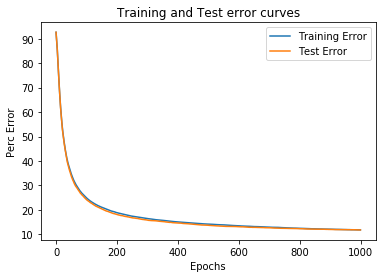

In [260]:
plot_train_and_val_curves()